# 1. Gather Datasets

I am using student performance dataset from the UC Irvine Machine Learning Repository for this project. One of the datasets is for mathematics and the other set is for Portuguese. This was the most practical datasets to use because it has periodic grades recorded in it.

Source: UCI Machine Learning Repository – Student Performance Dataset.
https://archive.ics.uci.edu/ml/datasets/student+performance

# 2. Create a Data Dictionary
|Variable  Name	|Role|	Type|	Demographic|	Description	|Missing Values|
|------------	|----|	----|  ------------|---------------|--------------|
|school |	Feature	|Categorical|		|student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)	|	no|
|sex	|Feature    |Binary	|Sex	|student's sex (binary: 'F' - female or 'M' - male)	|	no|
|age	|Feature	|Integer	|Age	|student's age (numeric: from 15 to 22)		|no|
|address	|Feature	|Categorical	|	|student's home address type (binary: 'U' - urban or 'R' - rural)		|no|
|famsize	|Feature	|Categorical	|Other	|family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)		|no|
|Pstatus	|Feature	|Categorical	|Other	|parent's cohabitation status (binary: 'T' - living together or 'A' - apart)		|no|
|Medu	|Feature	|Integer	|Education Level	|mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)		|no|
|Fedu	|Feature	|Integer	|Education Level	|father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)		|no|
|Mjob	|Feature	|Categorical	|Occupation	|mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')		|no|
|Fjob	|Feature	|Categorical	|Occupation	|father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')		|no|
reason	|Feature	|Categorical	|	|reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')		|no|
|guardian	|Feature	|Categorical	|	|student's guardian (nominal: 'mother', 'father' or 'other')		|no|
|traveltime	|Feature	|Integer	|	|home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)		|no|
|studytime	|Feature	|Integer	|	|weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)		|no|
|failures	|Feature	|Integer	|	|number of past class failures (numeric: n if 1<=n<3, else 4)		|no|
|schoolsup	|Feature	|Binary	|	|extra educational support (binary: yes or no)		|no|
|famsup	|Feature	|Binary	|	|family educational support (binary: yes or no)		|no|
|paid	|Feature	|Binary	|	|extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)		|no|
|activities	|Feature	|Binary	|	|extra-curricular activities (binary: yes or no)		|no|
|nursery	|Feature	|Binary	|	|attended nursery school (binary: yes or no)		|no|
|higher	|Feature	|Binary	|	|wants to take higher education (binary: yes or no)		|no|
|internet	|Feature	|Binary	|	|Internet access at home (binary: yes or no)		|no|
|romantic	|Feature	|Binary	|	|with a romantic relationship (binary: yes or no)		|no|
|famrel	|Feature	|Integer	|	|quality of family relationships (numeric: from 1 - very bad to 5 - excellent)		|no|
|freetime	|Feature	|Integer	|	|free time after school (numeric: from 1 - very low to 5 - very high)		|no|
|goout	|Feature	|Integer	|	|going out with friends (numeric: from 1 - very low to 5 - very high)		|no|
|Dalc	|Feature	|Integer	|	|workday alcohol consumption (numeric: from 1 - very low to 5 - very high)		|no|
|Walc	|Feature	|Integer	|	|weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)		|no|
|health	|Feature	|Integer	|	|current health status (numeric: from 1 - very bad to 5 - very good)		|no|
|absences	|Feature	|Integer	|	|number of school absences (numeric: from 0 to 93)		|no|
|G1	|Target	|Categorical	|	|first period grade (numeric: from 0 to 20)		|no|
|G2	|Target	|Categorical	|	|second period grade (numeric: from 0 to 20)		|no|
|G3	|Target	|Integer	|	|final grade (numeric: from 0 to 20, output target)		|no|

# 3. Data Cleaning & Preprocessing
No need to drop or fill in missing data because the data is complete.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Specify the correct separator for the CSV files
X = pd.read_csv('student-mat.csv', sep=';')  # your feature columns
y_df = pd.read_csv('student-por.csv', sep=';')  # your target variable



In [2]:
# Check for duplicate rows in X
print(X.duplicated().sum())

# Show duplicate rows
print(X[X.duplicated()])

0
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


In [3]:
# Use the final grade column 'G3' as the target
y = (y_df['G3'] >= 10).astype(int)  # 1 if passed, 0 if not


# Ensure X and y have the same number of samples
if len(X) != len(y):
    min_length = min(len(X), len(y))
    X = X[:min_length]
    y = y[:min_length]

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X)
# If y is categorical, convert it to numeric as well
if y.dtype == 'object':
    y = pd.get_dummies(y)
    # If y is now a DataFrame with more than one column, pick the correct target column
    y = y.iloc[:, 0]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Data Visualization


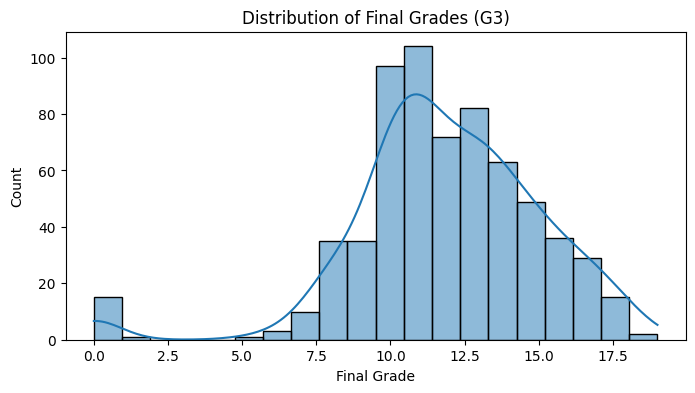

In [4]:
# Histogram of final grades (G3)
plt.figure(figsize=(8,4))
sns.histplot(y_df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

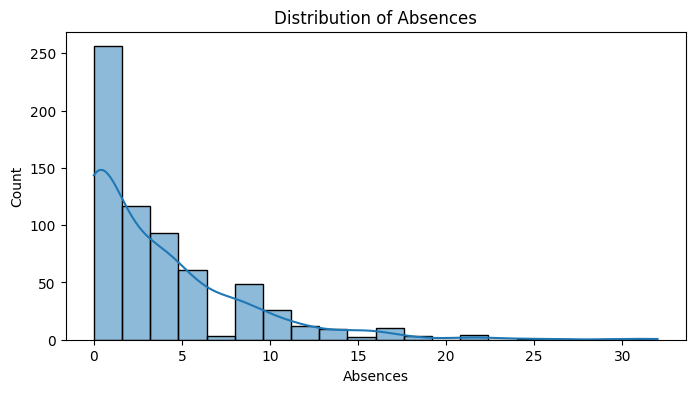

In [5]:
# Histogram: Distribution of absences
plt.figure(figsize=(8,4))
sns.histplot(y_df['absences'], bins=20, kde=True)
plt.title('Distribution of Absences')
plt.xlabel('Absences')
plt.ylabel('Count')
plt.show()

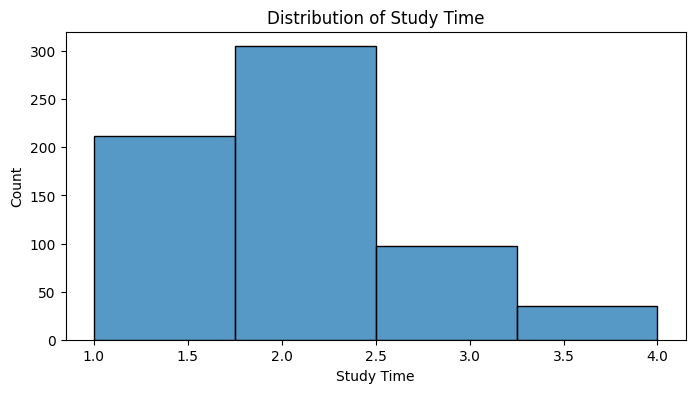

In [6]:
# Histogram: Distribution of studytime
plt.figure(figsize=(8,4))
sns.histplot(y_df['studytime'], bins=4, kde=False)
plt.title('Distribution of Study Time')
plt.xlabel('Study Time')
plt.ylabel('Count')
plt.show()


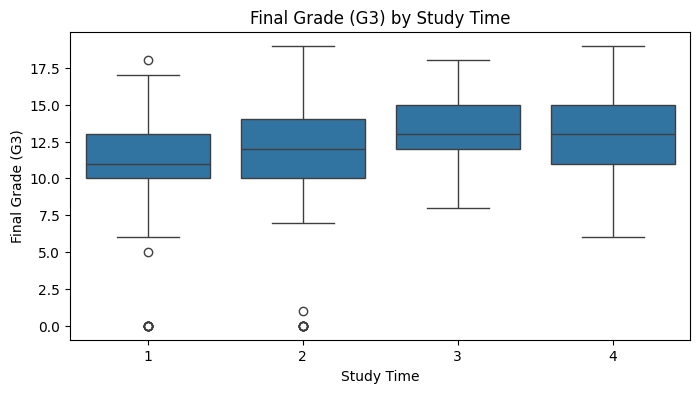

In [7]:
# Boxplot: G3 across studytime
plt.figure(figsize=(8,4))
sns.boxplot(x='studytime', y='G3', data=y_df)
plt.title('Final Grade (G3) by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


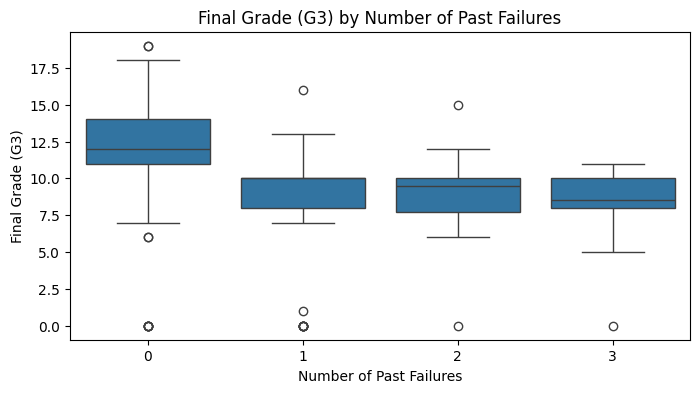

In [8]:
# Boxplot: G3 across failures
plt.figure(figsize=(8,4))
sns.boxplot(x='failures', y='G3', data=y_df)
plt.title('Final Grade (G3) by Number of Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('Final Grade (G3)')
plt.show()

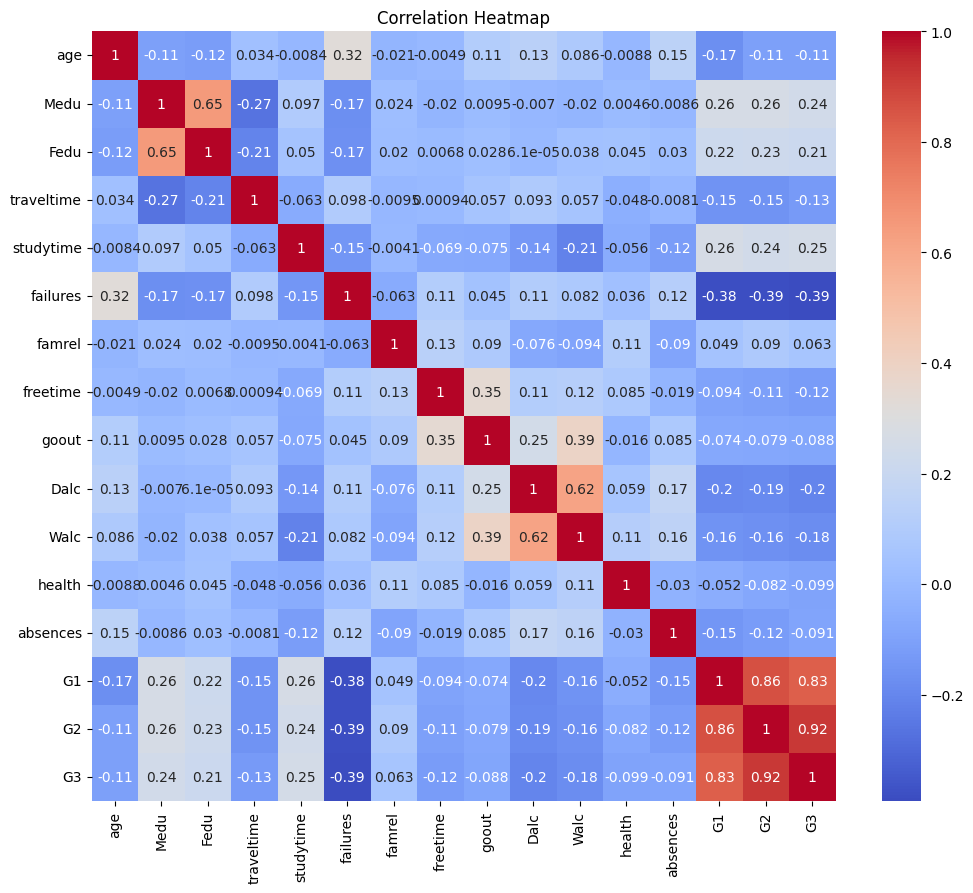

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,10))
numeric_cols = y_df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 5. Feature Engineering & Selection


In [15]:
# Redo feature engineering using the original DataFrame before scaling
X_df = pd.read_csv('student-mat.csv', sep=';')

# Create average_grade feature
X_df['average_grade'] = (X_df['G1'] + X_df['G2']) / 2

# Create high_absentee binary feature
X_df['high_absentee'] = (X_df['absences'] > 10).astype(int)

# Convert categorical columns to numeric using one-hot encoding
X_df = pd.get_dummies(X_df)

# Select features for modeling (make sure these columns exist after get_dummies)
selected_features = [
    'sex_F', 'sex_M', 'age', 'studytime', 'failures', 'schoolsup_yes',
    'average_grade', 'absences', 'high_absentee'
]
X_selected = X_df[selected_features]

# 6. Baseline Model Implementation 
Train-Test Split

In [16]:


# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Baseline Model: Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


 Second Model: Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


Cross-Validation 

In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_model, X, y, cv=5, scoring='f1')
print("Cross-validated F1 scores (Logistic Regression):", cv_scores)
print("Mean F1:", cv_scores.mean())


Cross-validated F1 scores (Logistic Regression): [0.94666667 0.91780822 0.94666667 0.90277778 0.93959732]
Mean F1: 0.9307033291450869


# 7. Model Evaluation


Logistic Regression Results:
Accuracy: 0.9240506329113924
Precision: 0.9230769230769231
Recall: 1.0
F1 Score: 0.96

Random Forest Results:
Accuracy: 0.9113924050632911
Precision: 0.9113924050632911
Recall: 1.0
F1 Score: 0.9536423841059603


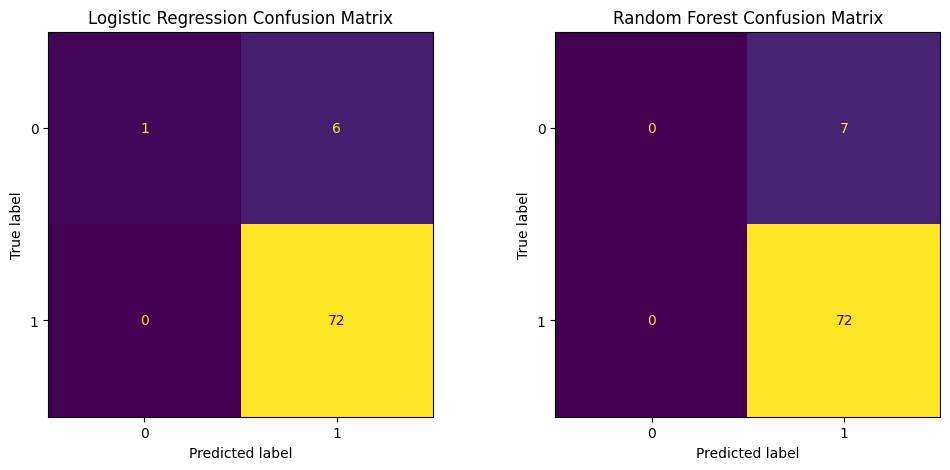

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

print("Logistic Regression Results:")
evaluate_model(y_test, y_pred_log)

print("\nRandom Forest Results:")
evaluate_model(y_test, y_pred_rf)

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], colorbar=False)
axes[1].set_title("Random Forest Confusion Matrix")
plt.show()


# Sprint 3
# Model Development and Optimization
### Model Choice
I chose Logistic Regression, Random Forest, and Decision Tree models for this project:
- **Logistic Regression** is a simple, interpretable baseline for binary classification.
- **Random Forest** is robust to overfitting and can capture non-linear relationships.
- **Decision Tree** provides interpretability and can model complex interactions.

Decion Tree Model

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.10      0.11        10
           1       0.92      0.93      0.92       109

    accuracy                           0.86       119
   macro avg       0.51      0.51      0.51       119
weighted avg       0.85      0.86      0.85       119

Confusion Matrix:


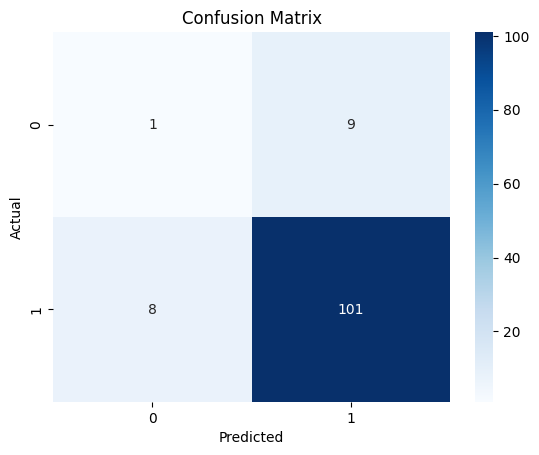

ROC AUC Score: 0.513302752293578


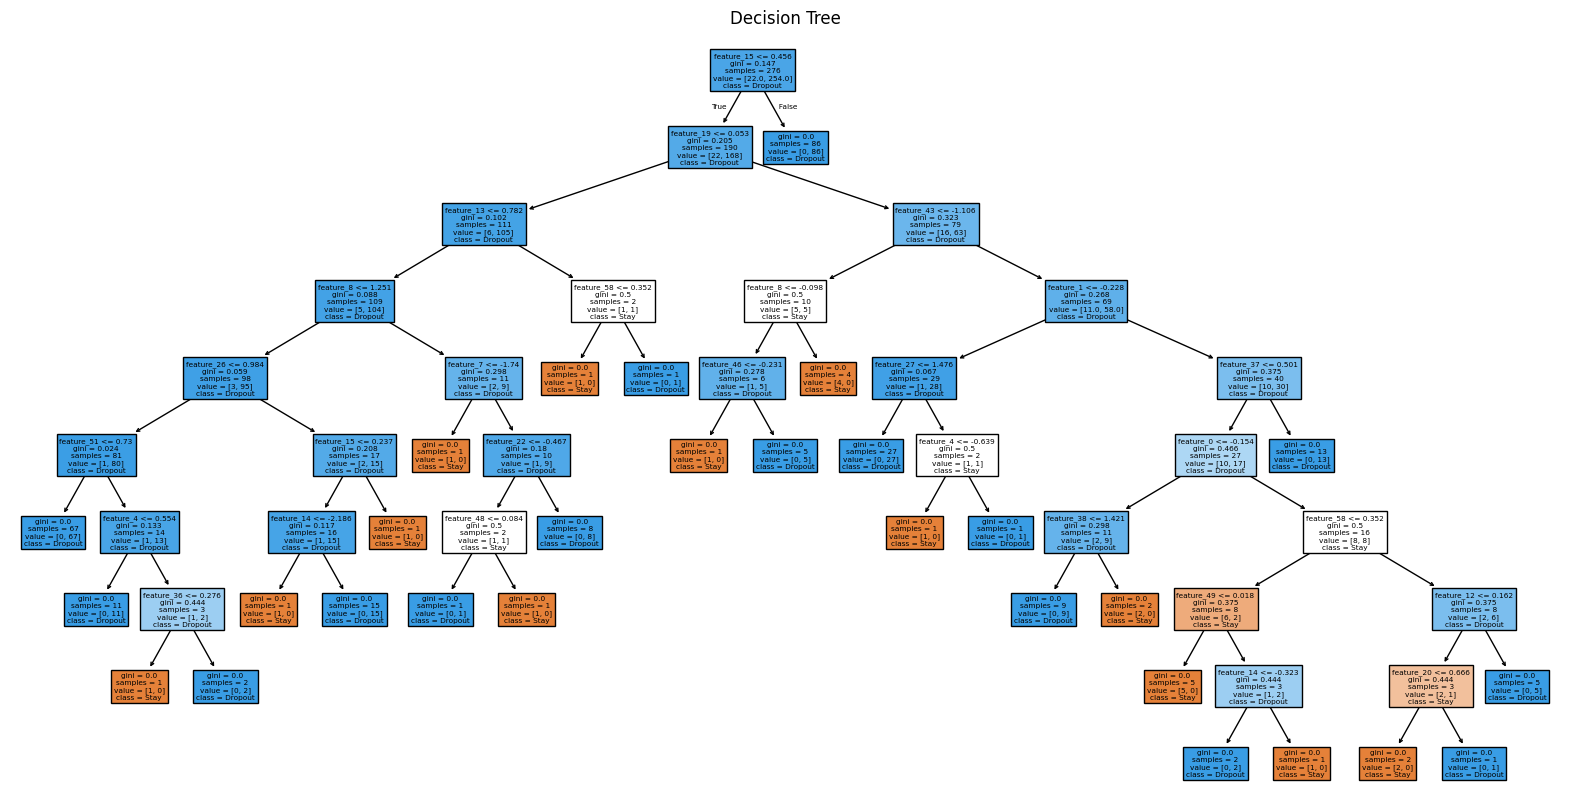

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Initialize and train the model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# 3. Predict on test set
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)[:, 1]

# 4. Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# 5. Visualize the tree
# If you want to show feature names, get them from the DataFrame after get_dummies
# You can use the following if you have X_df after get_dummies:
# feature_names = X_df.columns.tolist()
# Otherwise, just use generic names:
feature_names = [f"feature_{i}" for i in range(X.shape[1])]

plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=feature_names, class_names=["Stay", "Dropout"], filled=True)
plt.title("Decision Tree")
plt.show()


### Hyperparameter Tuning
I used `GridSearchCV` to tune hyperparameters for both Logistic Regression and Decision Tree:
- For Logistic Regression, I tuned the regularization strength (`C`), penalty type (`l1`, `l2`), and solver.
- For Decision Tree, I tuned `max_depth`, `min_samples_split`, and `criterion`.
- Tuning was done using 5-fold cross-validation and F1 score to balance precision and recall.

### Feature Selection & Engineering
Feature engineering and selection were used to improve model performance and interpretability:
- Created new features like `average_grade` (mean of G1 and G2) and `high_absentee` (binary indicator for absences > 10).
- Selected features based on domain knowledge and correlation analysis (e.g., sex, age, studytime, failures, schoolsup, average_grade, absences, high_absentee).
- This reduces noise, improves generalization, and helps the model focus on the most relevant information.

These steps ensure the models are both accurate and interpretable, and that they generalize well to new data.

Hyperparamater Tuning for Decision Tree , Random Forest, and Logistic Regression Model

In [26]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
# Use the best estimator
best_tree = grid.best_estimator_
y_pred_tree = best_tree.predict(X_test)
print("Test F1 score (Decision Tree):", f1_score(y_test, y_pred_tree))


Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Test F1 score (Decision Tree): 0.9375


In [23]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],             # Regularization strength
    'penalty': ['l1', 'l2'],             # Type of penalty
    'solver': ['liblinear']              # Solver compatible with l1 and l2
}

# Initialize and search
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# Show best parameters and score
print("Best parameters:", grid.best_params_)
print("Best cross-validated F1 score:", grid.best_score_)

# Use the best model
best_logreg = grid.best_estimator_
y_pred = best_logreg.predict(X_test)

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated F1 score: 0.9584888866497048


In [24]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize and search
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# Show best parameters and score
print("Best parameters:", grid.best_params_)
print("Best cross-validated F1 score:", grid.best_score_)

# Use the best model
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated F1 score: 0.9584888866497048


In [27]:
# --- 1. Metrics for all models ---
def print_metrics(y_true, y_pred, y_prob, model_name):
    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC:", roc_auc_score(y_true, y_prob))

# Probabilities for ROC/AUC
y_prob_log = best_logreg.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

print_metrics(y_test, y_pred, y_prob_log, "Logistic Regression")
print_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")
print_metrics(y_test, y_pred_tree, y_prob_tree, "Decision Tree")


Logistic Regression Metrics:
Accuracy: 0.9159663865546218
Precision: 0.9159663865546218
Recall: 1.0
F1 Score: 0.956140350877193
AUC: 0.5573394495412844

Random Forest Metrics:
Accuracy: 0.9159663865546218
Precision: 0.9159663865546218
Recall: 1.0
F1 Score: 0.956140350877193
AUC: 0.6490825688073395

Decision Tree Metrics:
Accuracy: 0.8823529411764706
Precision: 0.9130434782608695
Recall: 0.963302752293578
F1 Score: 0.9375
AUC: 0.6793577981651375


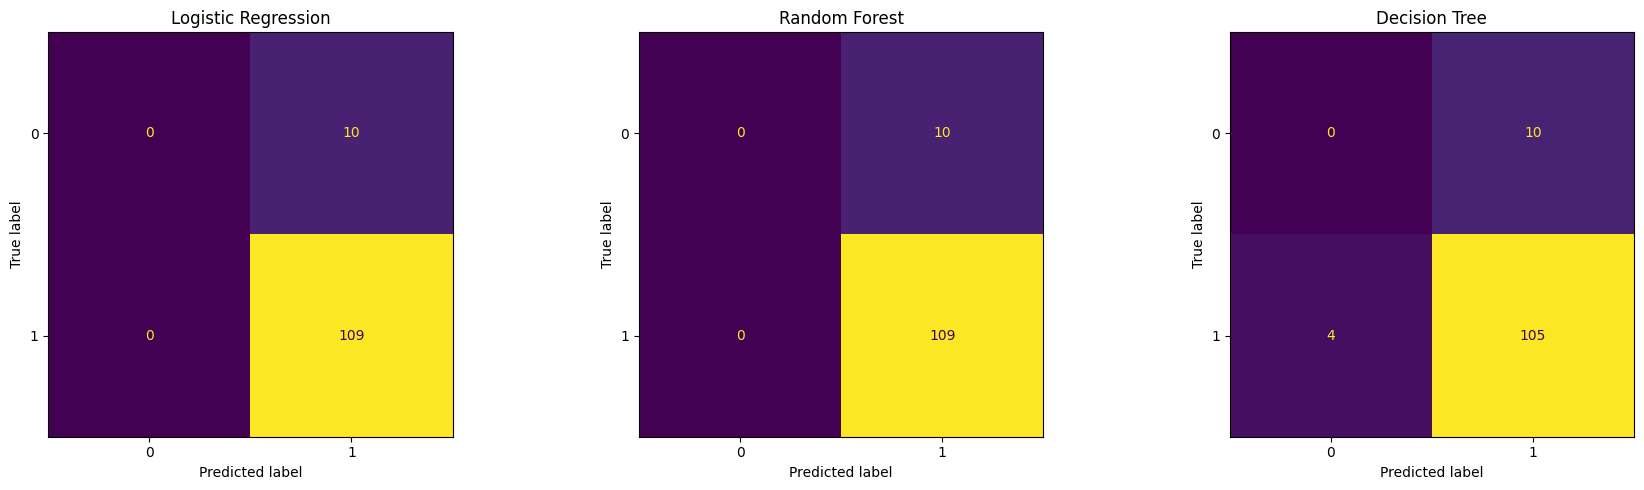

In [28]:
# --- 2. Confusion Matrices ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], colorbar=False)
axes[1].set_title("Random Forest")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, ax=axes[2], colorbar=False)
axes[2].set_title("Decision Tree")
plt.tight_layout()
plt.show()

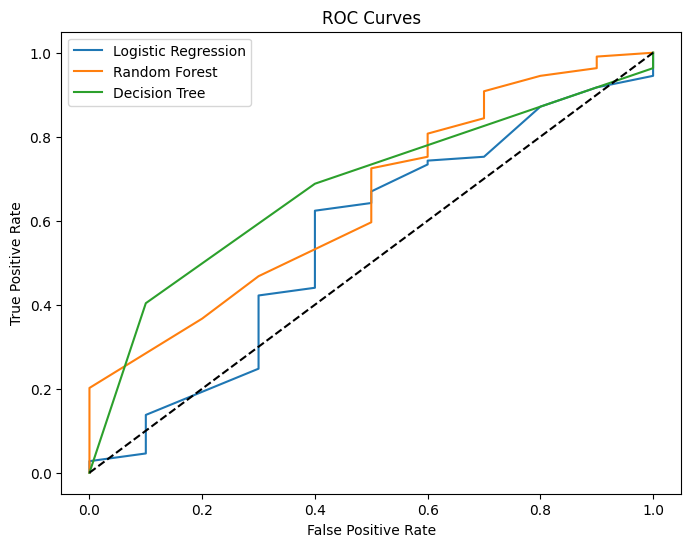

In [30]:
from sklearn.metrics import roc_curve, auc
# --- 3. ROC Curves ---
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


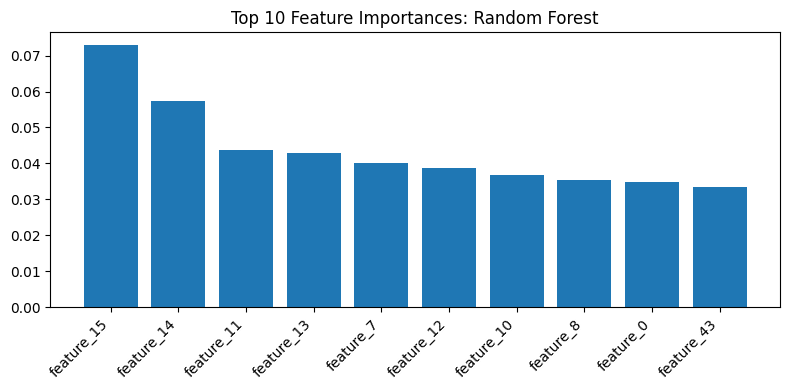

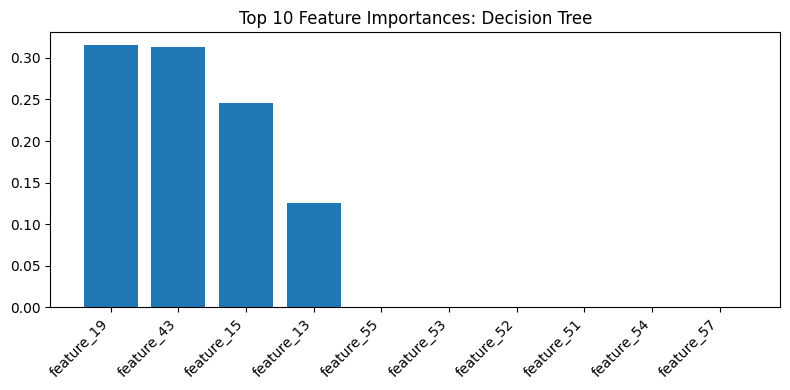

In [32]:
import numpy as np

# --- 4. Feature Importances (Random Forest & Decision Tree) ---
# If you have feature names:
# feature_names = X_df.columns.tolist()
feature_names = [f"feature_{i}" for i in range(X.shape[1])]

def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:10]  # Top 10
    plt.figure(figsize=(8,4))
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), np.array(feature_names)[indices], rotation=45, ha='right')
    plt.title(f"Top 10 Feature Importances: {model_name}")
    plt.tight_layout()
    plt.show()

plot_feature_importance(best_rf, "Random Forest")
plot_feature_importance(best_tree, "Decision Tree")


In [33]:
# --- 5. Qualitative Error Analysis ---
# Find misclassified samples for Logistic Regression
misclassified_idx = np.where(y_test != y_pred)[0]
print("\nSample misclassified cases (Logistic Regression):")
if hasattr(X_test, 'iloc'):
    display(pd.DataFrame(X_test).iloc[misclassified_idx].head())
else:
    print("X_test is a numpy array; cannot display feature names.")

# Repeat for other models if desired


Sample misclassified cases (Logistic Regression):
X_test is a numpy array; cannot display feature names.


## Business/Social Value and Impact

This predictive modeling solution enables the NGO to proactively identify students at risk of failing or dropping out, allowing for targeted interventions such as tutoring, counseling, or family outreach. By accurately flagging high-risk students, the NGO can allocate resources more efficiently, potentially improving graduation rates and long-term educational outcomes. For example, if the model helps reduce dropout rates by even 10%, dozens of students could remain in school each year, leading to better job prospects and breaking cycles of poverty in the community.

## Deployment Challenges

Deploying this solution may face several technical and organizational challenges. Technically, the NGO must ensure data privacy and security, especially when handling sensitive student information. The model’s accuracy may decrease if the data distribution changes over time or if new schools are added, requiring ongoing monitoring and retraining. Organizationally, staff may need training to interpret model outputs and integrate them into their workflows. There may also be resistance to relying on automated predictions for high-stakes decisions, so clear communication and stakeholder buy-in are essential for successful adoption.

## Ethics, Limitations, and Biases

This predictive solution raises important ethical considerations. Predictive models in education can unintentionally reinforce existing inequalities if not carefully monitored. For example, if the training data reflects historical biases (such as differences in support or outcomes for students from certain backgrounds), the model may unfairly predict higher dropout risk for those groups, leading to stigmatization or unequal allocation of resources.

Potential biases may arise if the model performs differently across populations (e.g., by gender, socioeconomic status, or school). This could happen if some groups are underrepresented in the data or if features used by the model correlate with protected attributes. To mitigate this, it is important to regularly audit model performance across subgroups, use fairness-aware metrics, and consider removing or reweighting biased features.

Limitations of this approach include reliance on available data—important factors like mental health, family issues, or unrecorded support may not be captured. The model may also struggle with edge cases, such as students who experience sudden life changes or those from new schools not represented in the training set. Continuous monitoring, stakeholder feedback, and periodic retraining are necessary to ensure the model remains fair, accurate, and beneficial for all students.